In [1]:
import pickle
import pandas as pd
import numpy
import re
import os
import numpy as np
import gensim
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import Doc2Vec

In [2]:
!pip uninstall gensim
!pip install gensim==3.8.3
!pip install nltk

Found existing installation: gensim 3.6.0
Uninstalling gensim-3.6.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/gensim-3.6.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/gensim/*
Proceed (y/n)? y
  Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 24.2 MB 1.7 MB/s 


In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import gensim
import numpy as np
import pandas as pd

%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/SO_data_error_queries.csv') 

In [6]:
data.head(10)

,Unnamed: 0,tags,is_answered,view_count,answer_count,score,last_activity_date,creation_date,question_id,link,title,accepted_answer_id
0,9,"['python', 'anaconda', 'conda', 'geopandas']",True,100417,12,80,2022-04-27,2019-02-17,54734667,https://stackoverflow.com/questions/54734667/e...,error installing geopandas gdal api version mu...,NaN
1,14,"['python', 'csv', 'unicode', 'syntax-error']",True,1611197,10,365,2022-04-27,2016-05-24,37400974,https://stackoverflow.com/questions/37400974/u...,unicode error unicodeescape codec decode bytes...,NaN
2,54,"['python', 'tensorflow', 'tensorflow-datasets'...",True,7946,1,-1,2022-04-27,2017-11-06,47143289,https://stackoverflow.com/questions/47143289/t...,tensorflow attributeerror module object attrib...,47144985.0
3,60,"['python', 'web-scraping']",True,1350,3,0,2022-04-27,2017-02-19,42330391,https://stackoverflow.com/questions/42330391/o...,oserror errno 22 invalid argument downloaded m...,NaN
4,70,['python'],True,27,1,0,2022-04-26,2022-04-26,72019169,https://stackoverflow.com/questions/72019169/w...,function errors parameter subprocess popen,72020351.0
5,84,"['python', 'pip']",True,18675,9,7,2022-04-26,2022-02-02,70961915,https://stackoverflow.com/questions/70961915/e...,error installing pytq5 pip preparing metadata ...,NaN
6,112,"['python', 'pytorch', 'huggingface-transformer...",True,573,3,0,2022-04-26,2021-12-27,70490710,https://stackoverflow.com/questions/70490710/r...,runtimeerror found dtype long expected float f...,NaN
7,114,"['python', 'tensorflow', 'bert-language-model']",True,1543,2,3,2022-04-26,2021-10-27,69736155,https://stackoverflow.com/questions/69736155/b...,bert model compile error typeerror invalid key...,NaN
8,135,"['python', 'tensorflow', 'image-processing', '...",True,364,1,2,2022-04-26,2021-05-02,67356839,https://stackoverflow.com/questions/67356839/i...,input_image_meta shape error using pixellib cu...,67661346.0
9,136,"['python', 'opencv', 'image-processing', 'orb']",True,23,1,1,2022-04-26,2022-04-26,72016648,https://stackoverflow.com/questions/72016648/v...,valueerror many values unpack expected 4 orb d...,72017125.0


In [7]:
data['title'].head()

0    error installing geopandas gdal api version mu...
1    unicode error unicodeescape codec decode bytes...
2    tensorflow attributeerror module object attrib...
3    oserror errno 22 invalid argument downloaded m...
4           function errors parameter subprocess popen
Name: title, dtype: object

In [8]:
# Assume that all text information is stored in title column of our dataset. Doc2vec requires text to be prepared in a specific way
LabeledSentence1 = gensim.models.doc2vec.TaggedDocument
all_content_train = []
j=0
for em in data['title'].values:
    all_content_train.append(LabeledSentence1(em,[j]))
    j+=1
print("Number of texts processed: ", j)

Number of texts processed:  25068


In [9]:
import smart_open

def read_corpus(fname, tokens_only=False):
        for i, line in enumerate(fname):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

In [10]:
data.dropna(subset = ["title"], inplace=True)

In [11]:
train_corpus = list(read_corpus(data["title"]))

In [12]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)

In [13]:
model.build_vocab(train_corpus)

In [14]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  


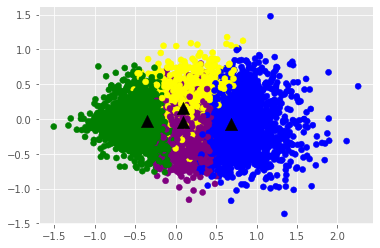

In [16]:
kmeans_model = KMeans(n_clusters=4, init='k-means++', max_iter=100) 
X = kmeans_model.fit(model.docvecs.doctag_syn0)
labels=kmeans_model.labels_.tolist()
l = kmeans_model.fit_predict(model.docvecs.doctag_syn0)
pca = PCA(n_components=2).fit(model.docvecs.doctag_syn0)
datapoint = pca.transform(model.docvecs.doctag_syn0)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
label1 = ["#FFFF00", "#008000", "#0000FF", "#800080"]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [17]:
so=pd.DataFrame(list(zip(data['title'],labels)),columns=['title','cluster'])

Cluster: 0
Titles


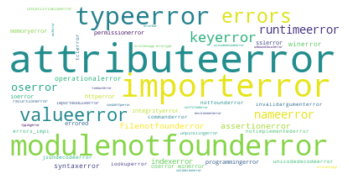

Cluster: 1
Titles


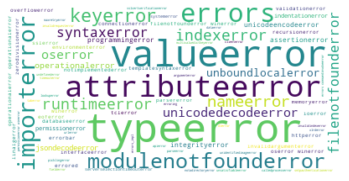

Cluster: 2
Titles


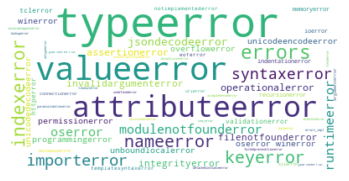

Cluster: 3
Titles


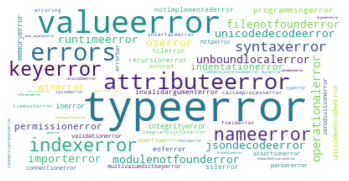

In [19]:
from wordcloud import WordCloud
result={'cluster':labels,'title':data['title']}
result=pd.DataFrame(result)
for k in range(0,4):
   s=result[result.cluster==k]
   text=s['title'].str.cat(sep=' ')
   text=text.lower()
   #text=' '.join([word for word in text.split()])
   text=' '.join([word for word in text.split() if "error" in word and word!="error"])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=so[so.cluster==k]['title']         
   #print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()